# Controllimg the FTI mockup setup
awojdyla@lbl.gov, chuzidachen@berkeley.edu
October 2024

somwhat useful:
https://pipython.physikinstrumente.com/pitools.html#setservo


In [1]:
# that doesn't work
from pipython import GCSDevice

### Creating an instance of a PI controller

In [2]:
pidevice=GCSDevice()

### List the available devices

In [3]:
pidevice.EnumerateUSB()

['Brushed Motor Controller SN 1276282881',
 'Brushless Motor Controller SN 1309803618',
 'Brushed Motor Controller SN 1276282888',
 'E-754.1CD Physik Instrumente (PI) SN 119020227']

### Connect through USB

In [4]:
pidevice.ConnectUSB(119020227)

In [5]:
from pipython import pitools
pitools.getaxeslist(pidevice,None)

['1']

In [6]:
from pipython import pitools
pitools.enableaxes(pidevice, '1')

In [7]:
pitools.setservo(pidevice, '1', True)

True

### Move one axis

In [8]:
pitools.moveandwait(pidevice, '1',1000 )

## Connecting to the camera

In [9]:
import pypylon.pylon as pylon
# get instance of the pylon TransportLayerFactory
tlf = pylon.TlFactory.GetInstance()

In [10]:
devices = tlf.EnumerateDevices()

In [11]:
cam = pylon.InstantCamera(tlf.CreateDevice(devices[0]))

In [12]:
cam.Open()

In [13]:
res = cam.GrabOne(1000)

In [14]:
import numpy as np
img = np.array(res.Array)

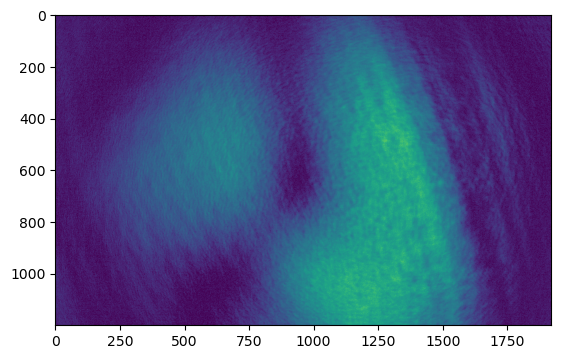

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [16]:
img

array([[ 6, 21,  6, ..., 19, 15, 19],
       [20,  0, 21, ...,  0,  0,  0],
       [14, 21,  6, ..., 34,  4, 34],
       ...,
       [ 0,  0, 19, ...,  0, 23,  0],
       [14, 19, 12, ...,  0,  0, 23],
       [20,  0, 33, ...,  0,  0,  0]], dtype=uint8)

## First scan

In [20]:
import time
displacements_um = np.linspace(0, 3, 100)
data = displacements_um*0
for i_d in range(len(displacements_um)):
    pitools.moveandwait(pidevice, '1',displacements_um[i_d])
    res = cam.GrabOne(1000)
    img = np.array(res.Array)
    #time.sleep(1)
    data[i_d] = img[1000,1000]
    

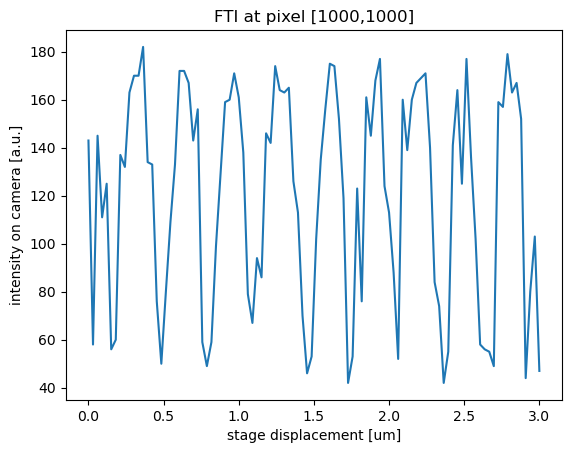

In [21]:
plt.plot(displacements_um, data)
plt.xlabel('stage displacement [um]')
plt.ylabel('intensity on camera [a.u.]')
plt.title('FTI at pixel [1000,1000]')
plt.show()

In [74]:
displacements1_um = np.linspace(0, 3, 200)
data1 = displacements1_um*0
for i_d in range(len(displacements1_um)):
    pitools.moveandwait(pidevice, '1',displacements1_um[i_d])
    res = cam.GrabOne(1000)
    img = np.array(res.Array)
    data1[i_d] = img[1000,1000]
    

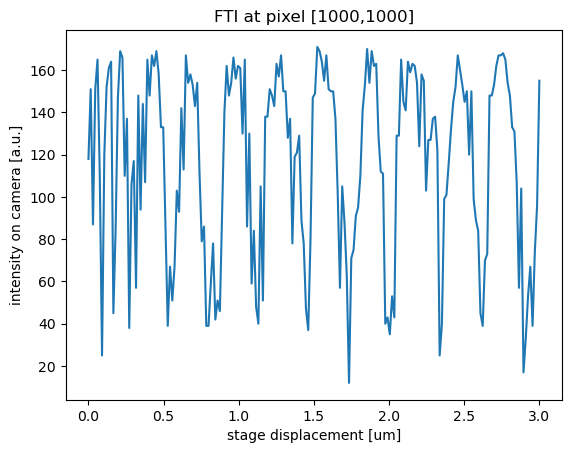

In [75]:
plt.plot(displacements1_um, data1)
plt.xlabel('stage displacement [um]')
plt.ylabel('intensity on camera [a.u.]')
plt.title('FTI at pixel [1000,1000]')
plt.show()

In [1]:
cam.close()

NameError: name 'cam' is not defined